In [5]:
import pandas as pd

In [7]:
matches = pd.read_csv('IPL/matches.csv')
matches.head

<bound method NDFrame.head of       id  season           city        date                        team1  \
0      1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017           Pune  2017-04-06               Mumbai Indians   
2      3    2017         Rajkot  2017-04-07                Gujarat Lions   
3      4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
5      6    2017      Hyderabad  2017-04-09                Gujarat Lions   
6      7    2017         Mumbai  2017-04-09        Kolkata Knight Riders   
7      8    2017         Indore  2017-04-10  Royal Challengers Bangalore   
8      9    2017           Pune  2017-04-11             Delhi Daredevils   
9     10    2017         Mumbai  2017-04-12          Sunrisers Hyderabad   
10    11    2017        Kolkata  2017-04-13              Kings XI Punjab   
11    12    2017      Bangalore  2017-04-14  Royal Challen

In [14]:
# insights

- Matches win per team
- %age of wins while batting first
- %age of matches which applied d/l method
- Matches wining per team per season `[2013 , 2014]`
- MoM vs Player graph, across all season, decending order.
- MoM vs Player graph, `[2010, 2011]`

SyntaxError: invalid syntax (<ipython-input-14-a6cbb6cee049>, line 3)

In [20]:
matches_2013 = matches[matches.season == 2013]
matches_2013.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel,NaN
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin,NaN
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel,NaN
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin,NaN
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN


In [16]:
matches.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

# Matches win per team

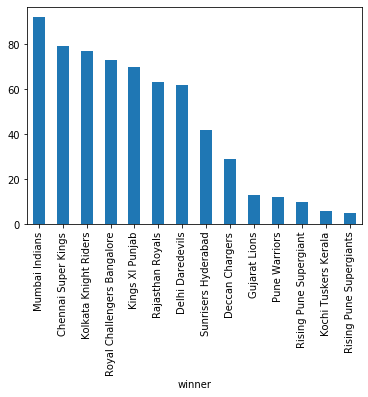

In [32]:
win_per_team= matches.groupby('winner')['winner'].count()
winners_desc = win_per_team.sort_values(ascending=False)
winners_desc.plot(kind='bar')

# %age of wins while batting first

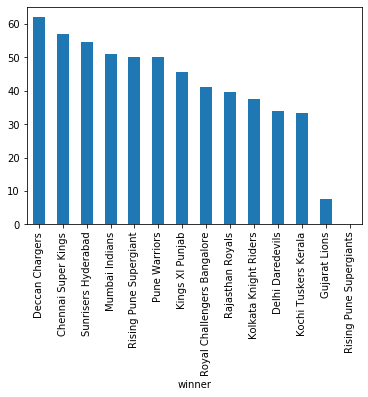

In [45]:
win_firstbat= matches[matches.team1==matches.winner]
win_firstbat_count=win_first_bat.groupby('winner')['winner'].count()
win = matches.groupby('winner')['winner'].count()
Percentage_win_firstbat = win_firstbat_count/win*100
Percentage_win = Percentage_win_firstbat.sort_values(ascending=False)
Percentage_win.plot(kind='bar')

# %age of matches which applied d/l method

In [11]:
matches_dl =matches[matches.dl_applied == 1].shape[0]
total = matches.shape[0]
per_dl=matches_dl/total*100
per_dl

2.515723270440252

# Matches wining per team per season `[2013 , 2014]`

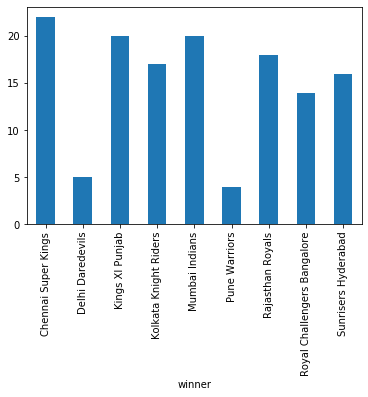

In [28]:
matches_total = matches[(matches.season== 2013)|(matches.season==2014)]
win = matches_total.groupby('winner')['winner'].count()
win.plot(kind='bar')

# MoM vs Player graph, across all season, decending order.

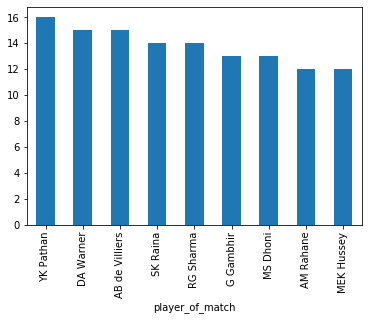

In [33]:
mom = matches.groupby('player_of_match')['player_of_match'].count()
mom_final = mom.sort_values(ascending=False)
mom_final[1:10].plot(kind='bar')

Insights
Batsmen vs Runs ( Sort in Descending Order )
Bowler vs Wickets ( Sort in Descending Order )
Bowler vs Extra Runs ( Sort in Descending Order )
Most number of no balls vs bowler ( Descending Order )
4's vs Batsmen
6's vs Batsmen

# Insights Batsmen vs Runs ( Sort in Descending Order )

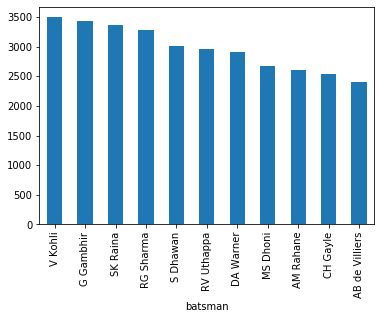

In [40]:
deliveries = pd.read_csv('IPL/deliveries.csv')
batsmen_win = deliveries.groupby('batsman')['total_runs'].count()
batsmen_win.sort_values(ascending=False)
batsmen_win.sort_values(ascending=False)[0:11].plot(kind='bar')

# Bowler vs Wickets ( Sort in Descending Order ) 

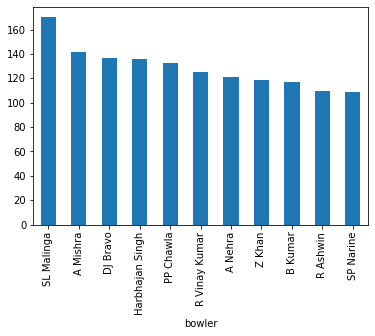

In [41]:
bowler_wic = deliveries.groupby('bowler')['player_dismissed'].count()
bowler_wic.sort_values(ascending=False)
bowler_wic.sort_values(ascending=False)[0:11].plot(kind='bar')

# Bowler vs Extra Runs ( Sort in Descending Order ) 

In [69]:
bowler_extra = deliveries[deliveries.extra_runs!=0]
extra = bowler_extra.groupby('bowler')['extra_runs'].count()
extra.sort_values(ascending=False).plot(kind='bar')

bowler
A Ashish Reddy        12
A Chandila             2
A Choudhary            7
A Flintoff             1
A Kumble              41
A Mishra              95
A Mithun              29
A Nehra               96
A Singh               24
A Symonds             29
A Uniyal               3
A Zampa                7
AA Chavan             17
AA Jhunjhunwala        4
AA Kazi                1
AA Noffke              2
AB Agarkar            57
AB Dinda              94
AB McDonald            4
AC Thomas             19
AC Voges               2
AD Mascarenhas         8
AD Mathews            29
AD Russell            35
AF Milne              12
AG Murtaza            10
AJ Finch               1
AJ Tye                 7
AL Menaria             3
AM Nayar              11
                    ... 
T Natarajan            7
T Shamsi               4
T Thushara            12
TA Boult              28
TG Southee            46
TL Suman               3
TM Dilshan             6
TP Sudhindra           5
TS Mills          

# Most number of no balls vs bowler ( Descending Order )

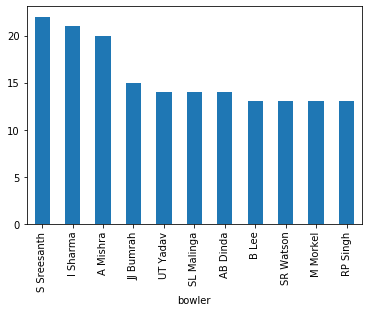

In [64]:
bowler_no = deliveries[deliveries.noball_runs ==1]
no_run = bowler_no.groupby('bowler')['bowler'].count()
no_run.sort_values(ascending=False)[0:11].plot(kind='bar')

# 4's vs Batsmen

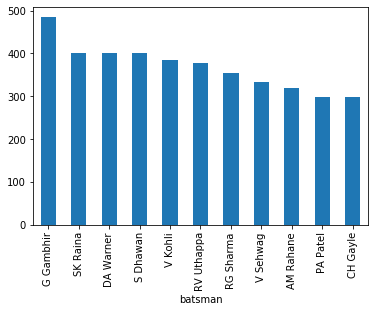

In [56]:
fours = deliveries[deliveries.batsman_runs==4]
countfours = fours.groupby('batsman')['batsman'].count()
countfours.sort_values(ascending=False)[0:11].plot(kind='bar')